In [1]:
#Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
from scipy.stats import skew, kurtosis
import datetime as dt
sns.set_style('darkgrid')

import yfinance as yf

1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.

In [2]:
#10 years of data
start_date = dt.datetime.today() - dt.timedelta(days = 10*365)
end_date = dt.datetime.today()


#apple index data, isolate the logreturn data as a numpy array.
apple_index = yf.download('AAPL', start = start_date, end = end_date)
apple_returns = apple_index['Close']/apple_index['Close'].shift(1)
apple_logreturns = np.log(apple_returns.dropna())['AAPL'].values

C:\Users\korodi.9\AppData\Local\Temp\ipykernel_28984\246786194.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_index = yf.download('AAPL', start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed


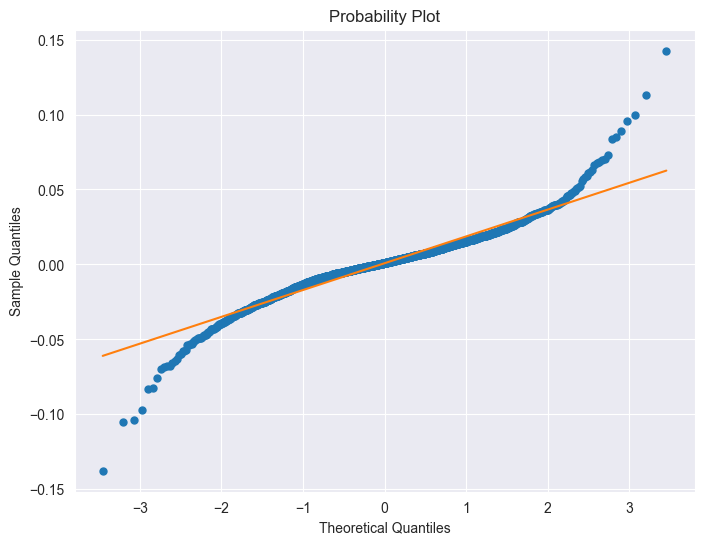

In [3]:
# Create the probability plot
fig = plt.figure(figsize=(8, 6))
res = stats.probplot(apple_logreturns, dist="norm")
plt.plot(res[0][0], res[0][1], 'o', markersize=5)  # Plot the data points
plt.plot(res[0][0], res[1][0] * res[0][0] + res[1][1])  # Plot the line
plt.title('Probability Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [4]:
#Collect p-values of normality tests
p_apple=stats.normaltest(apple_logreturns)[1]

#Print evidence/non-evidence of normality
print(f"AAPL log return distribution: p-value for 10 years = {p_apple:.4f}")
if p_apple< 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

AAPL log return distribution: p-value for 10 years = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.


In [5]:
p_apple_30=[]
days=50 #do the test for intervals of 50 days
normalintervals=0
for i in range(0,int(len(apple_logreturns)/days)-1):
    p_apple_30.append(stats.normaltest(apple_logreturns[i*days:(i+1)*days])[1])
    if p_apple_30[i]>0.05:
        normalintervals+=1

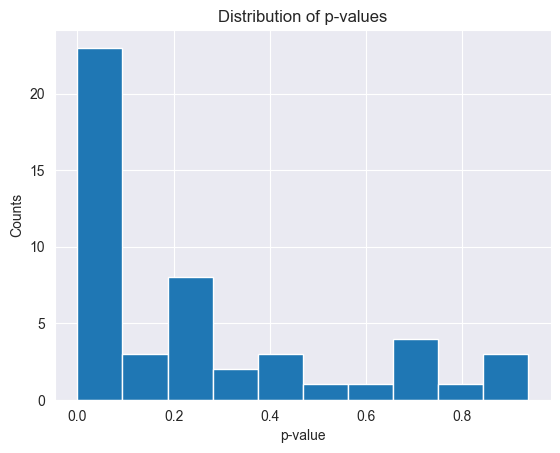

Chance for no statistical evidence agains the normal distribution of log returns in periods of 50 traiding days: 57.1%


In [6]:
plt.hist(p_apple_30)
plt.title('Distribution of p-values')
plt.xlabel('p-value')
plt.ylabel('Counts')
plt.show()
print(f'Chance for no statistical evidence agains the normal distribution of log returns in periods of {days} traiding days: {100*normalintervals/len(p_apple_30):.1f}%')

2) Test if removing extremal return data creates a distribution with evidence of being normal.

In [7]:
#1 year of data
start_date = dt.datetime.today() - dt.timedelta(days = 2*365)
end_date = dt.datetime.today()- dt.timedelta(days = 1*365)


#AAPL index data, isolate the logreturn data as a numpy array.
apple_index = yf.download('AAPL', start = start_date, end = end_date)
apple_returns = apple_index['Close']/apple_index['Close'].shift(1)
apple_logreturns = np.log(apple_returns.dropna())['AAPL'].values
apple_logreturns.sort()

C:\Users\korodi.9\AppData\Local\Temp\ipykernel_28984\243521327.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_index = yf.download('AAPL', start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed


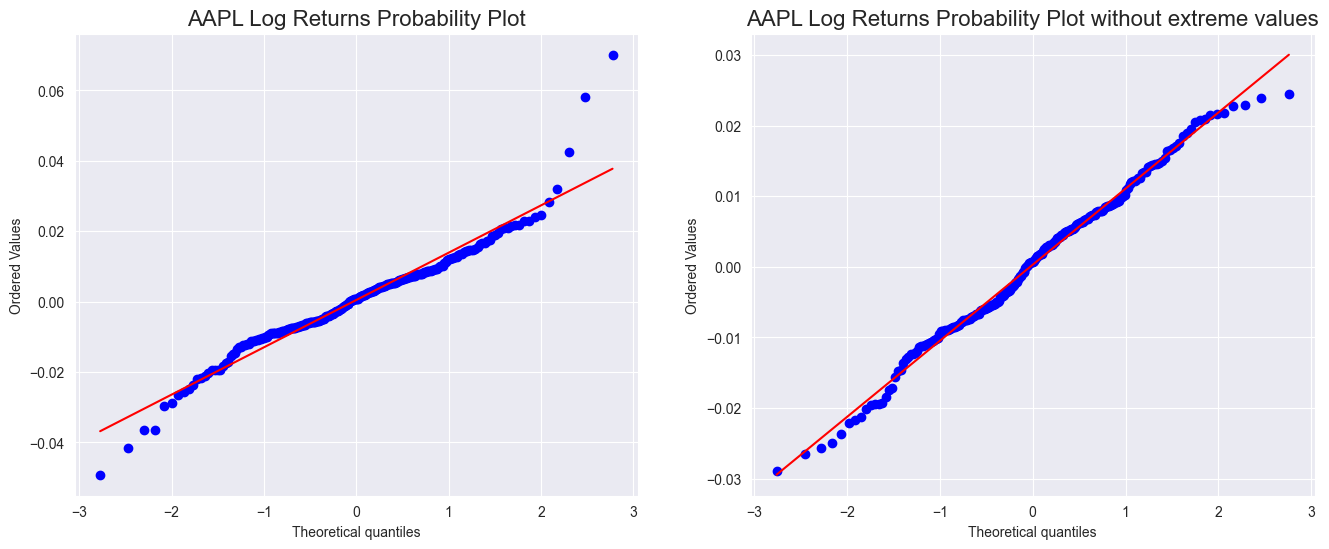

In [8]:
# Create 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Probability plot using all values
stats.probplot(apple_logreturns, dist="norm", plot=axes[0])
axes[0].set_title("AAPL Log Returns Probability Plot", fontsize=16)
axes[0].grid(True)

# Probability plot after removing 5 largest and smallest values
stats.probplot(apple_logreturns[5:-5], dist="norm", plot=axes[1])
axes[1].set_title("AAPL Log Returns Probability Plot without extreme values", fontsize=16)
axes[1].grid(True)

plt.show()

In [9]:
#Collect p-values of normality tests
p_apple=stats.normaltest(apple_logreturns)[1]

#Print evidence/non-evidence of normality
print(f"AAPL log return distribution: p-value for 1 year = {p_apple:.4f}")
if p_apple< 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

AAPL log return distribution: p-value for 1 year = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.


In [10]:
#Collect p-values of normality tests
p_apple=stats.normaltest(apple_logreturns[5:-5])[1]

#Print evidence/non-evidence of normality
print(f"AAPL log return distribution: p-value for 1 year after removing the 5 largest and smallest returns = {p_apple:.4f}")
if p_apple< 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

AAPL log return distribution: p-value for 1 year after removing the 5 largest and smallest returns = 0.6741
→ No statistically significant evidence against normality.


Removing the 5 largest and smallest return values significantly increased the p-value. After the removal, there is no evidence agains normality.

3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.

In [11]:
tickers = ['AGG', 'VNQ','JNJ','GLD','SPLV'] #some stocks that were close to normal historically
data = yf.download(tickers, start="2024-01-01", end="2024-12-31")['Close']

C:\Users\korodi.9\AppData\Local\Temp\ipykernel_28984\4106599667.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2024-01-01", end="2024-12-31")['Close']
[*********************100%***********************]  5 of 5 completed


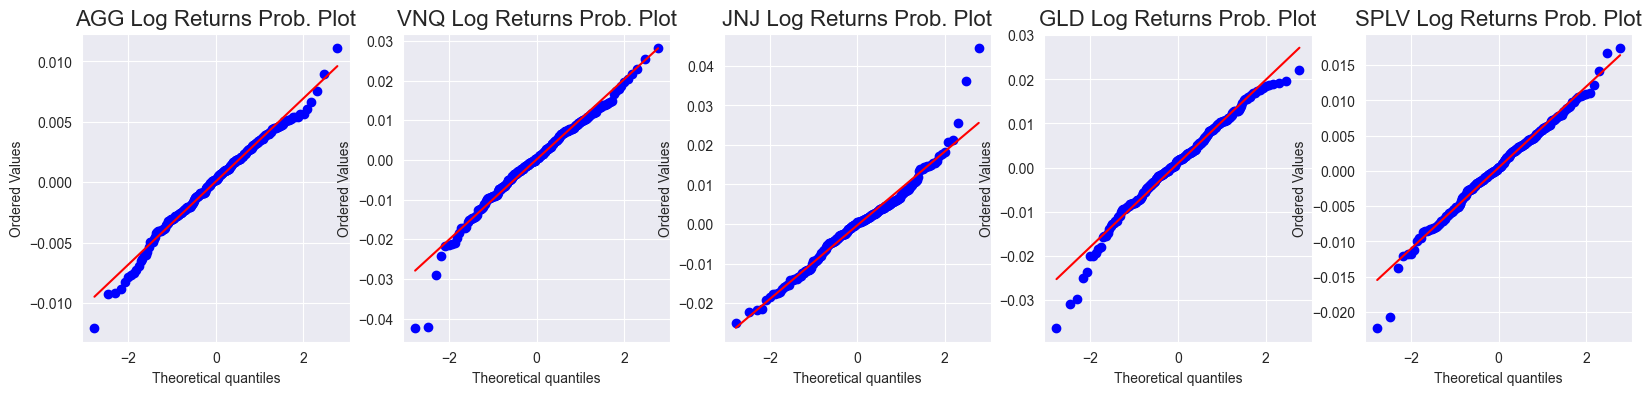

In [12]:
# Probability plots
log_returns = np.log(data / data.shift(1)).dropna()
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

i=0
for stock in tickers:
    stats.probplot(log_returns[stock], dist="norm", plot=axes[i])
    axes[i].set_title(f'{stock} Log Returns Prob. Plot', fontsize=16)
    axes[i].grid(True)
    i+=1
    

plt.show()

In [13]:
from scipy.optimize import differential_evolution # had to use more sophisticated minimizing package
# I will find weights for a portfolio such that the portfolio's log-return distribution is as close to normal as possible
# I will achieve this by maximizing the p-value of the normal hypothesis

n_assets = log_returns.shape[1]

# Penalized objective to ensure weights sum to 1
def penalized_objective(weights):
    weights = np.array(weights)
    weights = weights / np.sum(weights)  # normalize
    portfolio_returns = log_returns @ weights
    _, p = stats.normaltest(portfolio_returns)
    return -p  # maximize p-value (minimize -p)

# Bounds: weights between 0 and 1
bounds = [(0, 1)] * n_assets


# Run differential evolution
result = differential_evolution(penalized_objective, bounds, strategy='best1bin', maxiter=1000, tol=1e-6)

# Normalize weights to sum to 1
optimal_weights = result.x / np.sum(result.x)
portfolio_returns = log_returns @ optimal_weights
_, final_pval = stats.normaltest(portfolio_returns)

# Print results
print(f'Final p-value: {final_pval:.4f}')
if final_pval < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")
print("Optimal weights for normality:")
for i, t in enumerate(tickers):
    print(f"{t}: {optimal_weights[i]:.4f}")

Final p-value: 0.2033
→ No statistically significant evidence against normality.
Optimal weights for normality:
AGG: 0.2814
VNQ: 0.0000
JNJ: 0.3597
GLD: 0.3589
SPLV: 0.0000


4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.

In [14]:
# High risk portfolio from Project1
tickers = ['NVDA', 'TSLA', 'ARKK', 'COIN', 'BITO']
data = yf.download(tickers, start="2014-01-01", end="2024-12-31")['Close']

C:\Users\korodi.9\AppData\Local\Temp\ipykernel_28984\350720982.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2014-01-01", end="2024-12-31")['Close']
[*********************100%***********************]  5 of 5 completed


In [15]:
log_returns = np.log(data / data.shift(1)).dropna()

weights=[0.3010,0.2351,0.1,0.2639,0.1]

portfolio_returns = log_returns @ weights

In [16]:
# p-values for the portfolio in intervals of 50 days
p_highrisk=[]
days=50
normalintervals=0
for i in range(0,int(len(portfolio_returns)/days)-1):
    p_highrisk.append(stats.normaltest(portfolio_returns[i*days:(i+1)*days])[1])
    if p_highrisk[i]>0.05:
        normalintervals+=1

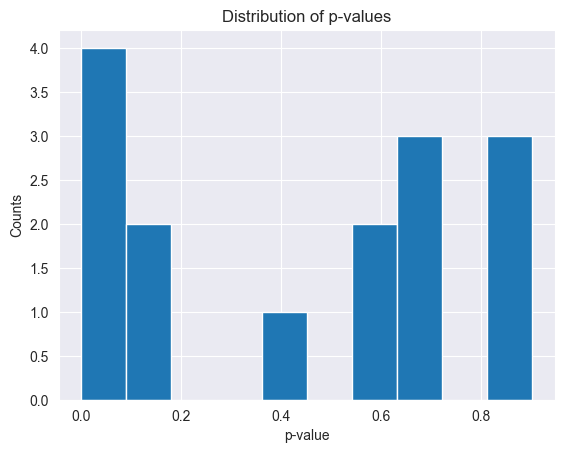

Chance for no statistical evidence agains the normal distribution of log returns in periods of 50 traiding days: 80.0%


In [17]:
plt.hist(p_highrisk)
plt.title('Distribution of p-values')
plt.xlabel('p-value')
plt.ylabel('Counts')
plt.show()
print(f'Chance for no statistical evidence agains the normal distribution of log returns in periods of {days} traiding days: {100*normalintervals/len(p_highrisk):.1f}%')

In [18]:
# Low risk portfolio from Project1
tickers = ['BND', 'VNQ', 'VTI', 'XLP', 'GLD']
data = yf.download(tickers, start="2014-01-01", end="2024-12-31")['Close']

log_returns = np.log(data / data.shift(1)).dropna()

weights=[0.35,0.1876,0.1,0.1,0.2622]

portfolio_returns = log_returns @ weights

# p-values for the portfolio in intervals of 50 days
p_lowrisk=[]
days=50
normalintervals=0
for i in range(0,int(len(portfolio_returns)/days)-1):
    p_lowrisk.append(stats.normaltest(portfolio_returns[i*days:(i+1)*days])[1])
    if p_lowrisk[i]>0.05:
        normalintervals+=1

C:\Users\korodi.9\AppData\Local\Temp\ipykernel_28984\3371861367.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2014-01-01", end="2024-12-31")['Close']
[*********************100%***********************]  5 of 5 completed


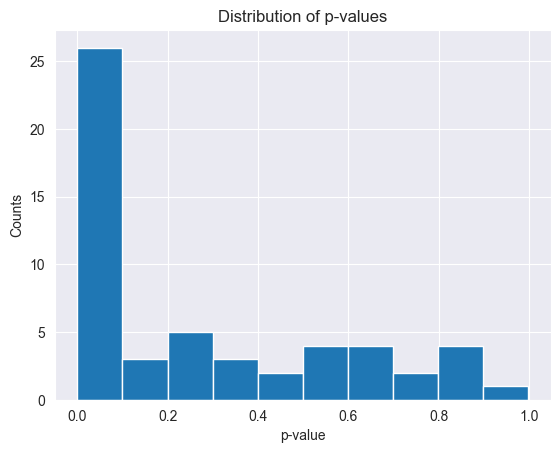

Chance for no statistical evidence agains the normal distribution of log returns in periods of 50 traiding days: 57.4%


In [19]:
plt.hist(p_lowrisk)
plt.title('Distribution of p-values')
plt.xlabel('p-value')
plt.ylabel('Counts')
plt.show()
print(f'Chance for no statistical evidence agains the normal distribution of log returns in periods of {days} traiding days: {100*normalintervals/len(p_lowrisk):.1f}%')

5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

In [20]:
import random

# Load S&P 500 tickers from Wikipedia
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500 = pd.read_html(sp500_url)[0]
all_tickers = sp500['Symbol'].tolist()

n_stocks = 100

# Choose 100 random stocks
random_tickers = random.sample(all_tickers, n_stocks)

# Download their price data
data = yf.download(random_tickers, start="2024-01-01", end="2024-12-31")['Close']
log_returns = np.log(data / data.shift(1)).dropna()



C:\Users\korodi.9\AppData\Local\Temp\ipykernel_28984\2304539462.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(random_tickers, start="2024-01-01", end="2024-12-31")['Close']
[*********************100%***********************]  100 of 100 completed


In [21]:
# Calculate p-value for each stock
p_values=stats.normaltest(log_returns)[1]
normalreturns=0
normal_stocks=[]
for i in range(0,len(p_values)):
    if(p_values[i]>0.05):
        normalreturns+=1
        normal_stocks.append(random_tickers[i])

print(f'Out of {n_stocks} S&P500 stocks, {normalreturns} had log returns with normal distribution in 2024.')
print(f'These stocks are: {normal_stocks}')

Out of 100 S&P500 stocks, 8 had log returns with normal distribution in 2024.
These stocks are: ['EQIX', 'GM', 'LULU', 'MDT', 'BAX', 'HAL', 'DOC', 'ABT']
